In [30]:
from packages import *
from functions import *
import matplotlib.ticker as mticker
%matplotlib inline

In [31]:
def ecdf_points(data):
    L=len(data)
    data_array=[]
    for i in range(L):
        data_array.append(data[i])
    np.asarray(data_array,float)
    x=np.sort(data_array)
    y=np.arange(0,1,1/L)
    X=[x[0]]
    Y=[y[0]]
    for i in range(0,L-1):
        if(x[i]!=x[i+1]):
            X.append(x[i+1])
            Y.append(y[i+1])
    X=np.asarray(X,float)
    Y=np.asarray(Y,float)
    return X,Y

    
def tail(x):
    x_ecdf,y_ecdf=ecdf_points(x)
    Y_ecdf=1-y_ecdf
    return x_ecdf, Y_ecdf  

In [32]:
%%time
#Yakovenko Exchange

N=1000
M=1000
x_fixed_debt=np.ones(N)*M
T=10000000
exchange=50
debt=-1000


for t in range(T):
    i=random.randint(0,N-1)
    j=random.randint(0,N-1)
    if(i!=j and x_fixed_debt[j]>debt):
            x_fixed_debt[i]+=exchange
            x_fixed_debt[j]-=exchange

CPU times: user 29.5 s, sys: 4 ms, total: 29.5 s
Wall time: 29.5 s


In [46]:

%%time

# super reinforcement/non-linear reinforcement

W0=1
W=1
N=500

g=1.3

T=100000

individuals_wealth_sr=np.ones(N)*W0

individuals_sr=[]
for i in range(N):
    for j in range(p):
        individuals_sr.append(i)


s=[]

for i in range(T):
    r=(i+1)**g-i**g
    r=int(r)
    s.append(r)
    
for t in range(T):
    j=random.choice(individuals_sr)
    j=int(j)
    individuals_wealth_sr[j]+=W
    W_j=int(individuals_wealth_sr[j])
    p_j=s[W_j]
    add_list=np.ones(p_j)*j
    individuals_sr=np.concatenate((individuals_sr,add_list))

#print(s)

CPU times: user 8.07 s, sys: 4 ms, total: 8.07 s
Wall time: 8.07 s


In [47]:
%%time

#Vallejos growth model

W0=1000
W=100
N=500

individuals_wealth=np.ones(N)*W0

individuals=np.arange(0,N,1)

T=100000
g=1.3


for t in range(T):
    powers=[]

    for i in range(N):
        powers.append(individuals_wealth[i]**g)

    sum_powers=sum(powers)

    probabilities=[]

    for i in range(N):
        probabilities.append(powers[i]/sum_powers)

    j=np.random.choice(individuals, 1, p=probabilities)[0]

    individuals_wealth[j]+=W

CPU times: user 38.2 s, sys: 456 ms, total: 38.7 s
Wall time: 37.1 s


In [48]:
x1,y1=tail(x_fixed_debt)

(array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 <a list of 8 Text yticklabel objects>)

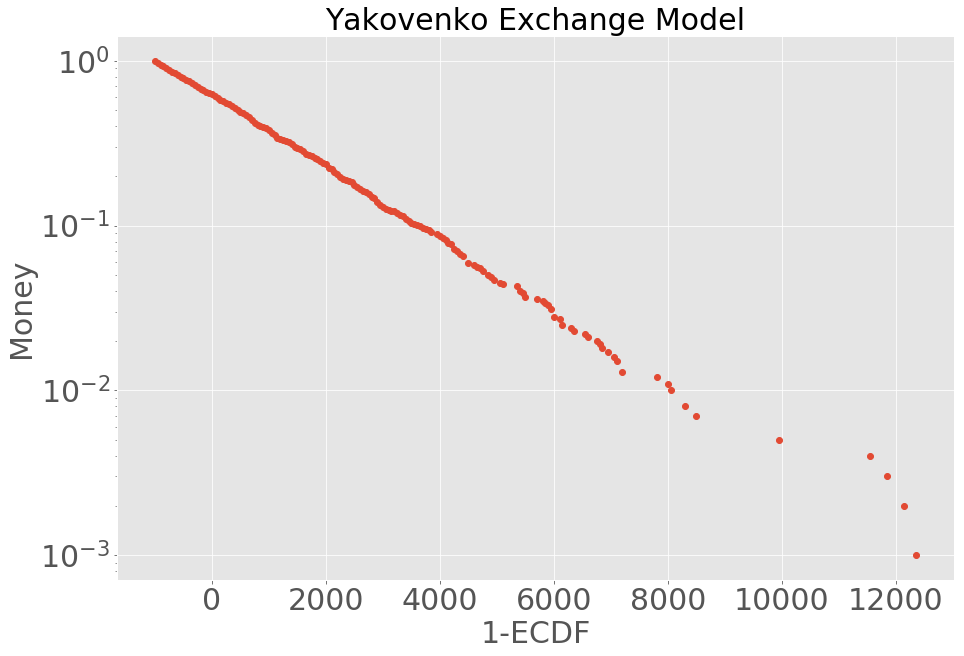

In [49]:
plt.figure(figsize=(15,10))
plt.semilogy(x1,y1,'o')
plt.title('Yakovenko Exchange Model',fontsize=30)
plt.xlabel('1-ECDF',fontsize=30)
plt.ylabel('Money',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [50]:
x2,y2=tail(individuals_wealth_sr)

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 <a list of 7 Text yticklabel objects>)

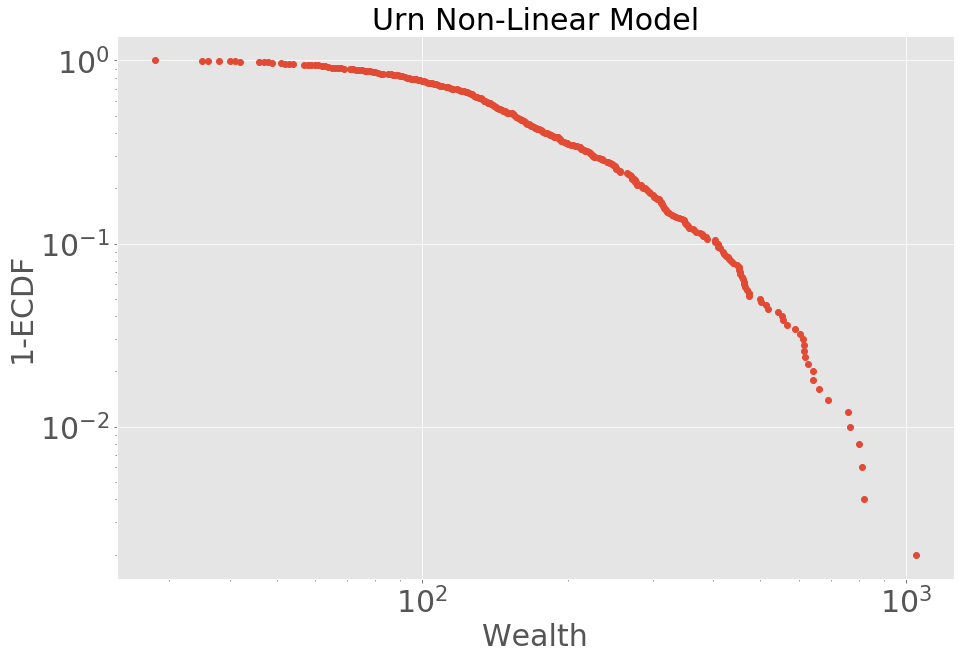

In [51]:
plt.figure(figsize=(15,10))
plt.loglog(x2,y2,'o')

plt.title('Urn Non-Linear Model',fontsize=30)
plt.xlabel('Wealth',fontsize=30)
plt.ylabel('1-ECDF',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [52]:
x3,y3=tail(individuals_wealth)

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 <a list of 7 Text yticklabel objects>)

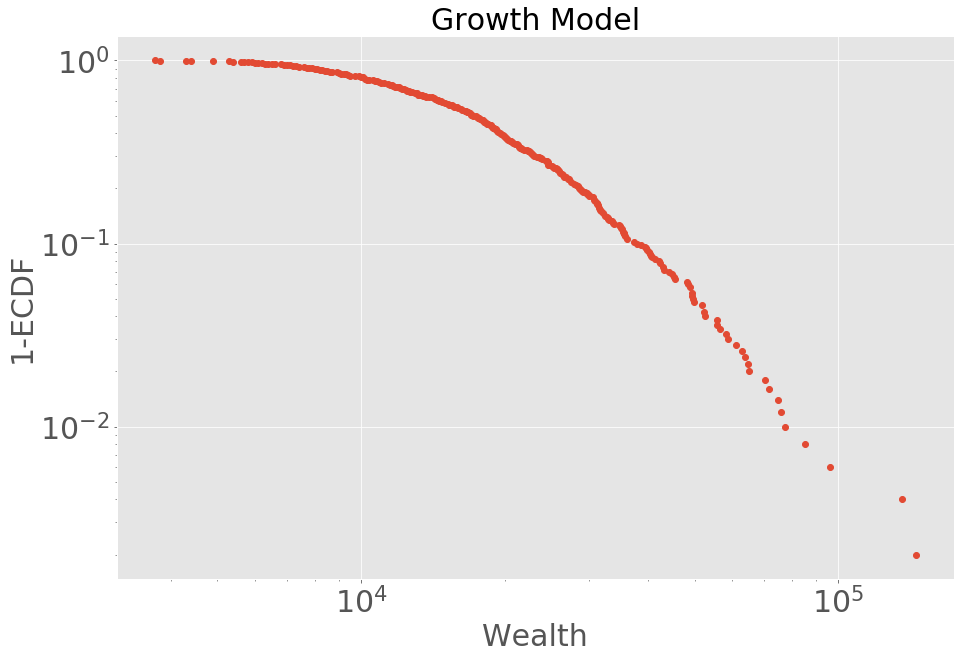

In [53]:
plt.figure(figsize=(15,10))
plt.loglog(x3,y3,'o')

plt.title('Growth Model',fontsize=30)
plt.xlabel('Wealth',fontsize=30)
plt.ylabel('1-ECDF',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)